## SVR (Support Vector Regression)


* **정의**: SVM을 회귀에 적용한 모델로, 예측값이 실제값과 **ε 이내**에 들어가도록 학습함.


* **핵심 원리**:


  * **ε-튜브** 내 오차는 무시, 밖의 오차만 손실로 처리
  * 최대한 많은 데이터를 튜브 안에 넣고, 바깥 오차는 패널티 적용
  * 튜브 폭(ε), 규제(C), 커널 종류에 따라 모델 성능이 달라짐


* **특징**:


  * **마진 기반 회귀**로 노이즈에 강하고 일반화 능력 우수
  * **커널 트릭**으로 비선형 회귀도 가능


* **하이퍼파라미터**:


  * **ε (튜브 폭)**: 오차 허용 범위
  * **C**: 튜브 밖 오차에 대한 벌칙 강도
  * **Kernel**: 선형/비선형 선택


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

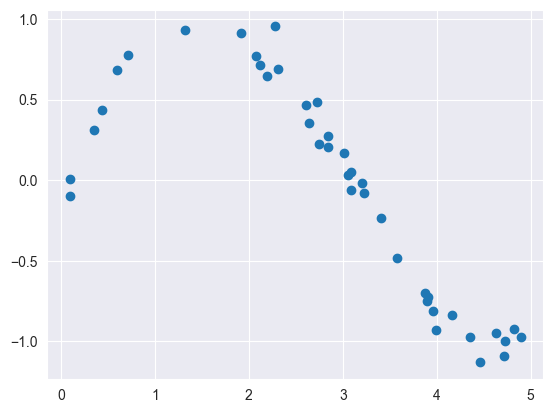

In [2]:
# 샘플데이터 생성
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0) # 균등분포, 0~5사이, 오름차순 정렬
y = np.sin(X).ravel() + 0.1 * np.random.randn(40)
# ravel() : 배열을 1차원으로 펴주는 함수 ex) (2,3) -> (6,)

plt.scatter(X, y, label='data')
plt.show()

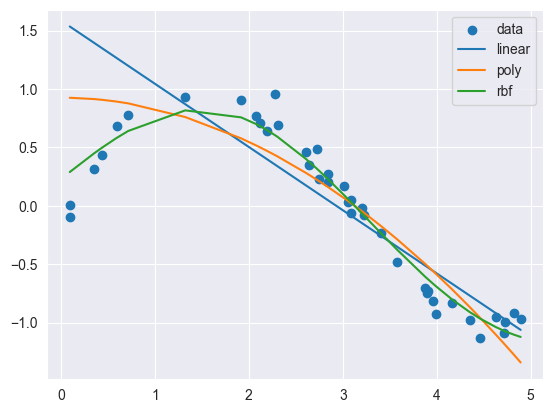

In [3]:
# SVR 모델 학습
# - 선형 커널
# - rbf 커널
# - 다항 커널



from sklearn.svm import SVR
# 모델 준비
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=2)
svr_rbf = SVR(kernel='rbf', gamma=0.1) # 곡선이 얼마나 휘어질지 결정

# 학습
svr_lin.fit(X, y)
svr_poly.fit(X, y)
svr_rbf.fit(X, y)

# 예측
y_lin = svr_lin.predict(X)
y_poly = svr_poly.predict(X)
y_rbf = svr_rbf.predict(X)

# 시각화
plt.scatter(X, y, label='data')
plt.plot(X, y_lin, label='linear')
plt.plot(X, y_poly, label='poly')
plt.plot(X, y_rbf, label='rbf')
plt.legend()
plt.show()


## 실습 : California Housing Dataset
 1. 데이터로드
 2. SVR 여러 커널 테스트
 3. 평가지표 확인
- 커널별로 C(규제억수), epsilon, gamma 하이퍼파라미터 확인

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [5]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

print('X 스케일링 전 :', X_train[:1])
print('y 스케일링 전 :', y_train[:1])

# 회귀 스케일링
# SVR은 X, y 둘 다 스케일링 해야한다.
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)


y_scaler = StandardScaler()
# scaler 객체는 2차원으로 데이터 입력해야한다.
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1,1)).ravel()


print('X 스케일링 후 :', X_train[:1])
print('y 스케일링 후 :', y_train[:1])


(16512, 8) (16512,)
(4128,) (4128,)
X 스케일링 전 : [[ 3.25960000e+00  3.30000000e+01  5.01765650e+00  1.00642055e+00
   2.30000000e+03  3.69181380e+00  3.27100000e+01 -1.17030000e+02]]
y 스케일링 전 : [1.03]
X 스케일링 후 : [[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]]
y 스케일링 후 : [-0.90118909]


In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# 커널별 비교
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', degree=2)
svr_rbf = SVR(kernel='rbf', gamma=0.1)


# 학습
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)



# 예측
y_lin = svr_lin.predict(X_test)
y_poly = svr_poly.predict(X_test)
y_rbf = svr_rbf.predict(X_test)



# 평가 MSE
print('linear MSE : ', mean_squared_error(y_test, y_lin))
print('poly MSE : ', mean_squared_error(y_test, y_poly))
print('rbf MSE : ', mean_squared_error(y_test, y_rbf))



linear MSE :  0.4335467873480871
poly MSE :  1.027939927265857
rbf MSE :  0.2717475390503814


In [7]:
# 예측치
y_pred_scaled = svr_rbf.predict(X_test) # scaling된 예측치
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel() # 원래 단위로 복원

# y도 스케일링 됐을테니 다시 복원해 줘야한다.

print(y_pred_scaled)
print(y_pred)

[-1.32725485 -0.40715647  1.24181069 ...  2.33814426 -1.16930233
 -0.28394629]
[0.53738649 1.60119618 3.5077176  ... 4.77528888 0.72000982 1.74365072]


In [8]:
# 하이퍼파라미터 최적화
# - kernel : linear, poly, rbf
# - C 규제역수 : (규제강함) 0,01, 0.1, 1 (규제약함)
# - epsilon 튜브 : 오차 범위 0.01, 0.1, 0.5
# - gamma :  데이터 포인터 적용 여부 : auto, scale, 0.1, 0.01
from sklearn.model_selection import GridSearchCV


param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1],
    'epsilon' : [0.01, 0.1],
    'gamma' : ['scale', 'auto']
}

svr = SVR()
grid_search = GridSearchCV(
    svr,
    param_grid = param_grid,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=1 # 로그출력 허용
)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


,estimator,SVR()
,param_grid,"{'C': [0.1, 1], 'epsilon': [0.01, 0.1], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,2
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [9]:
# 결과
print('best_params', grid_search.best_params_)
print('best_score', -1 * grid_search.best_score_)

# 예측
best_model = grid_search.best_estimator_
y_pred_scaled = best_model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
print(y_pred_scaled[:3])
print(y_pred[:3])

best_params {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
best_score 0.268169515626697
[-1.34523679 -0.44686838  1.35591   ]
[0.51659593 1.55528163 3.63963822]
